In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the data
df = pd.read_csv("US_Accidents_Dec20_updated.csv")
df.shape

(1516064, 47)

In [3]:
df.head()  

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [5]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [7]:
data = df.isna().sum().sort_values(ascending = False)
data

Number                   1046095
Precipitation(in)         510549
Wind_Chill(F)             449316
Wind_Speed(mph)           128862
Humidity(%)                45509
Visibility(mi)             44211
Weather_Condition          44007
Temperature(F)             43033
Wind_Direction             41858
Pressure(in)               36274
Weather_Timestamp          30264
Airport_Code                4248
Timezone                    2302
Zipcode                      935
Sunrise_Sunset                83
Civil_Twilight                83
Nautical_Twilight             83
Astronomical_Twilight         83
City                          83
Country                        0
Give_Way                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout                     0
Railway   

In [8]:
#Calculating the percentage to misssing values
percent_missing = data / len(df) *100

In [9]:
percent_missing

Number                   69.000715
Precipitation(in)        33.675953
Wind_Chill(F)            29.637007
Wind_Speed(mph)           8.499773
Humidity(%)               3.001786
Visibility(mi)            2.916170
Weather_Condition         2.902714
Temperature(F)            2.838469
Wind_Direction            2.760965
Pressure(in)              2.392643
Weather_Timestamp         1.996222
Airport_Code              0.280199
Timezone                  0.151841
Zipcode                   0.061673
Sunrise_Sunset            0.005475
Civil_Twilight            0.005475
Nautical_Twilight         0.005475
Astronomical_Twilight     0.005475
City                      0.005475
Country                   0.000000
Give_Way                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                      0.000000
Station             

#Dropping these columsn as these are not useful to the dataset

In [10]:
df_1 = df.drop(columns = ["ID", "Start_Lng", "Start_Lat"], axis = 0 )

In [11]:
df_1.shape

(1516064, 44)

In [12]:
df_1.columns

Index(['Severity', 'Start_Time', 'End_Time', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

- Let us look deeper into State and CIty for more insisght

In [13]:
df_1["State"]. unique()

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

In [14]:
top_10_accidents = df_1.State.value_counts()

In [15]:
top_10_accidents[:10]

CA    448833
FL    153007
OR     87484
TX     75142
NY     60974
MN     52345
VA     51198
NC     50159
PA     42844
IL     41709
Name: State, dtype: int64

- From this we can see that California, Florida and Oregon and Texas are the top 4 states where accidents are the highest

<AxesSubplot:>

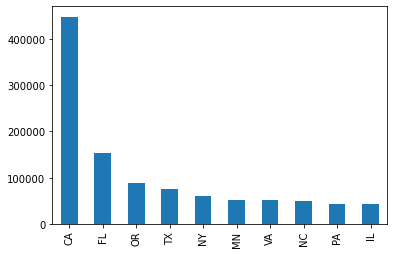

In [16]:
top_10_accidents[:10]. plot(kind = "bar")

In [17]:
df_1.columns

Index(['Severity', 'Start_Time', 'End_Time', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [18]:
df.City.unique()

array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Succasunna', 'Valleyford',
       'American Fork-Pleasant Grove'], dtype=object)

In [19]:
df.City.value_counts()

Los Angeles                     39984
Miami                           36233
Charlotte                       22203
Houston                         20843
Dallas                          19497
                                ...  
Manzanita                           1
West Brooklyn                       1
Garfield Heights                    1
Belding                             1
American Fork-Pleasant Grove        1
Name: City, Length: 10657, dtype: int64

- Finding the top 10 cities where most accidents have occured

In [20]:
city_accidents = df.City.value_counts()
city_accidents[:10]

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
Sacramento     18431
Orlando        16169
Portland       14805
San Diego      14090
Minneapolis    12653
Name: City, dtype: int64

- From this we can see that LA, Miami,Charlotte and Houston are the top 4 cities with highest accidents

<AxesSubplot:>

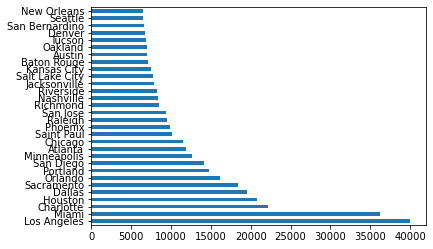

In [21]:
city_accidents[:30].plot(kind = "barh")

- From this we can see that there a lot of cities from California(LA, Sacramento, San Antonio, San Jose, San Diego) which matches our observation that California is the highest state where accidents occur, the second is Miami and Texas being the next highest(Houstan, Dallas and Austin) are among the top cities.

In [22]:
high_accidents = city_accidents[city_accidents>1000]

- Most Accident prone cities

In [23]:
high_accidents

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
               ...  
Elgin           1007
Chandler        1006
Palo Alto       1006
Sandy           1001
Flushing        1001
Name: City, Length: 251, dtype: int64

In [24]:
#The start time of an accident is time marked
df_1.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:15:39
4          2016-02-08 06:51:45
                  ...         
1516059    2019-08-23 18:03:25
1516060    2019-08-23 19:11:30
1516061    2019-08-23 19:00:21
1516062    2019-08-23 19:00:21
1516063    2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: object

In [25]:
df_1.Start_Time =pd.to_datetime(df.Start_Time)

In [26]:
#Pulling the hour from this in order to check what time does most accidents occur
df_1.Start_Time.dt.hour

0           0
1           5
2           6
3           6
4           6
           ..
1516059    18
1516060    19
1516061    19
1516062    19
1516063    18
Name: Start_Time, Length: 1516064, dtype: int64

/Users/rennithabraham/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

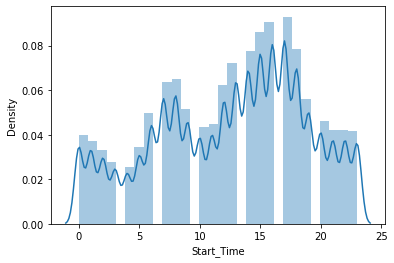

In [27]:
sns.distplot(df_1.Start_Time.dt.hour, bins = 30)

- From this we can see that there is one huge peak between the time 5pm and 12pm at night showing that a lot of accidents occur at this time

In [28]:
#extracting month, year, hour and weekday from timestamp

df_1["Month"] = df_1["Start_Time"].dt.month
df_1["Year"] = df_1["Start_Time"].dt.year
df_1["Hour"] = df_1["Start_Time"].dt.hour
df_1["Weekday"] = df_1["Start_Time"].dt.weekday

In [29]:
df_1.Year.unique()

array([2016, 2017, 2020, 2019, 2018])

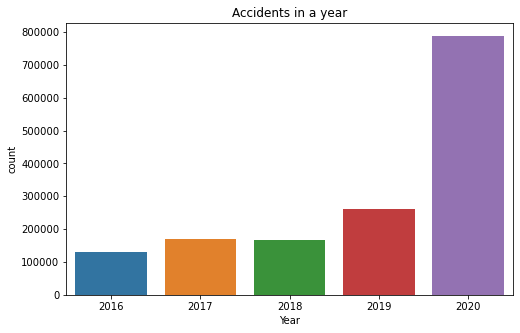

In [30]:
fig = plt.figure(figsize = (8,5))
sns.countplot(x = "Year", data = df_1)
plt.title("Accidents in a year")
plt.show()

- Here we can see that we have the years from 2016 to 2020 has a vast difference between the number of accidents from the year 2016 to 2017

In [52]:
#Subsetting the Year Column

df_1_2016 = df_1[df_1.Start_Time.dt.year == 2016]
df_1_2017 = df_1[df_1.Start_Time.dt.year == 2017]
df_1_2018 = df_1[df_1.Start_Time.dt.year == 2018]
df_1_2019 = df_1[df_1.Start_Time.dt.year == 2019]
df_1_2020 = df_1[df_1.Start_Time.dt.year == 2020]


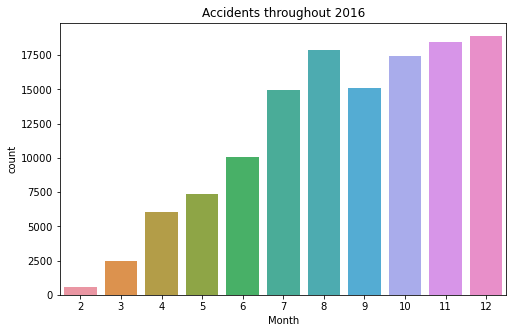

In [32]:
#Monthly accidents in 2016

fig = plt.figure(figsize = (8,5))
sns.countplot(x = "Month", data = df_1_2016)
plt.title("Accidents throughout 2016")
plt.show()

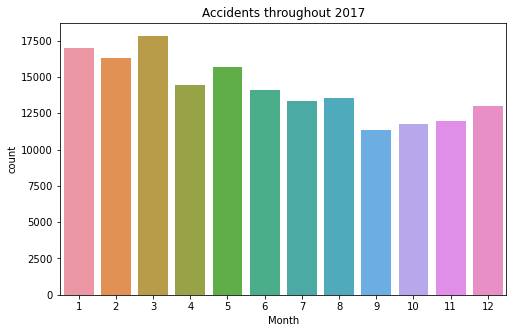

In [54]:
fig = plt.figure(figsize = (8,5))
sns.countplot(x = "Month", data = df_1_2017)
plt.title("Accidents throughout 2017")
plt.show()

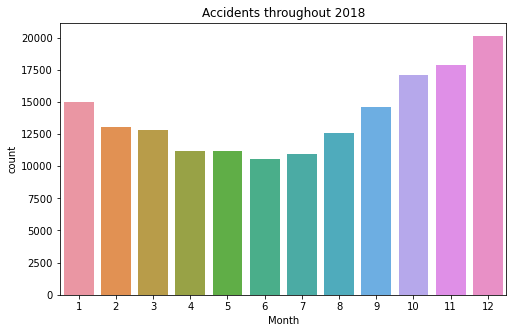

In [55]:
fig = plt.figure(figsize = (8,5))
sns.countplot(x = "Month", data = df_1_2018)
plt.title("Accidents throughout 2018")
plt.show()

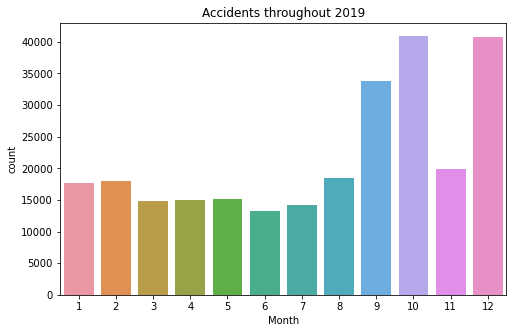

In [56]:
fig = plt.figure(figsize = (8,5))
sns.countplot(x = "Month", data = df_1_2019)
plt.title("Accidents throughout 2019")
plt.show()

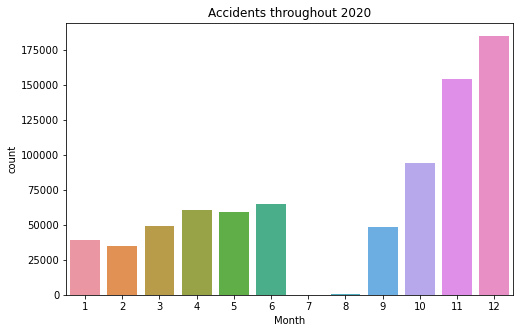

In [57]:
fig = plt.figure(figsize = (8,5))
sns.countplot(x = "Month", data = df_1_2020)
plt.title("Accidents throughout 2020")
plt.show()

In [33]:
df_1["Temperature(F)"].unique()

array([ 4.210e+01,  3.690e+01,  3.600e+01,  3.900e+01,  3.700e+01,
        3.560e+01,  3.380e+01,  3.310e+01,  3.200e+01,  3.510e+01,
        3.400e+01,  3.340e+01,  2.800e+01,  2.660e+01,  2.500e+01,
        2.300e+01,  2.100e+01,  1.900e+01,  2.120e+01,  2.190e+01,
        1.940e+01,  2.250e+01,  2.410e+01,  3.020e+01,  3.180e+01,
        3.000e+01,  2.890e+01,  3.090e+01,  1.990e+01,  1.580e+01,
        1.710e+01,  1.220e+01,  1.400e+01,  1.530e+01,  1.760e+01,
        2.480e+01,  1.800e+01,  1.600e+01,  7.000e+00,  1.200e+01,
        1.510e+01,  9.000e+00,  9.100e+00,  1.650e+01,  1.290e+01,
        1.000e+01,  6.100e+00,  8.100e+00,  5.000e+00,  3.000e+00,
              nan,  2.280e+01,  2.520e+01,  2.700e+01,  2.430e+01,
        2.570e+01,  2.980e+01,  3.220e+01,  2.840e+01,  3.300e+01,
        3.790e+01,  3.240e+01,  3.270e+01,  1.090e+01,  4.300e+01,
        3.990e+01,  5.110e+01,  4.690e+01,  4.800e+01,  3.740e+01,
        5.310e+01,  6.400e+01,  5.000e+01,  4.890e+01,  6.100e

In [34]:
df_1["Temperature(F)"].value_counts()

 59.0    32387
 63.0    31595
 68.0    30898
 57.0    30862
 64.0    30778
         ...  
-18.2        1
-18.4        1
-23.3        1
-21.1        1
-27.4        1
Name: Temperature(F), Length: 775, dtype: int64

/Users/rennithabraham/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature(F)', ylabel='Density'>

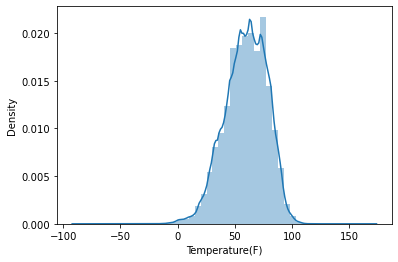

In [35]:
sns.distplot(df["Temperature(F)"])

- We can see that at high temperature higher accidents tend to occur

In [36]:
df_1.Weather_Condition.unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', nan, 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Mist',
       'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix', 'Partly Cloudy / Windy', 'Heavy T-Storm', 'Sand',
       'Ligh

In [37]:
df_1.Weather_Condition.value_counts()

Fair                     465252
Mostly Cloudy            193595
Clear                    180223
Cloudy                   161291
Partly Cloudy            133102
                          ...  
Dust Whirls                   1
Drifting Snow                 1
Thunder and Hail              1
Mist / Windy                  1
Freezing Rain / Windy         1
Name: Weather_Condition, Length: 116, dtype: int64

- We can infer that a majority of accidents occur when it is Clear, Overcast and Mostly Cloudy

In [38]:
df_1["Humidity(%)"] .unique()

array([ 58.,  91.,  97.,  55.,  93., 100.,  92.,  70.,  96.,  79.,  88.,
        80.,  86.,  82.,  90.,  74.,  84.,  81.,  73.,  77.,  85.,  78.,
        68.,  75.,  63.,  65.,  57.,  56.,  87.,  59.,  60.,  83.,  62.,
        48.,  71.,  54.,  52.,  46.,  42.,  50.,  41.,  51.,  66.,  67.,
        nan,  89.,  94.,  76.,  69.,  72.,  31.,  44.,  38.,  49.,  45.,
        35.,  29.,  43.,  32.,  33.,  34.,  26.,  47.,  37.,  30.,  40.,
        61.,  64.,  53.,  99.,  27.,  39.,  17.,  28.,  24.,  98.,  95.,
        36.,  23.,  18.,  19.,  22.,  21.,  25.,   4.,  11.,  20.,  15.,
        12.,  16.,  14.,  13.,   9.,  10.,   7.,   5.,   8.,   6.,   2.,
         3.,   1.])

In [39]:
df_1["Humidity(%)"].value_counts()

93.0     58126
100.0    53509
89.0     32328
87.0     31189
90.0     30850
         ...  
5.0       1246
4.0        724
3.0        246
2.0         88
1.0         11
Name: Humidity(%), Length: 100, dtype: int64

/Users/rennithabraham/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity(%)'>

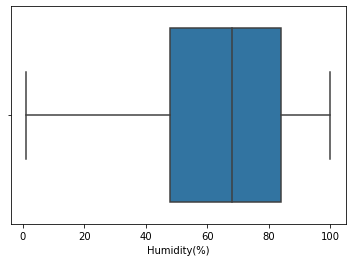

In [40]:
sns.boxplot(df_1["Humidity(%)"])

- When humidity is between 60-80 there are more accidents

In [41]:
df_1["Visibility(mi)"].unique()

array([1.00e+01, 3.00e+00, 5.00e-01, 1.80e+00, 1.00e+00, 6.00e+00,
       8.00e+00, 2.00e+00, 1.50e+00, 1.20e+00, 5.00e+00, 2.50e+00,
       4.00e+00, 8.00e-01, 7.00e+00, 9.00e+00,      nan, 7.50e-01,
       2.00e+01, 2.50e-01, 2.00e-01, 1.50e+01, 3.00e+01, 5.50e+00,
       1.30e+01, 6.00e+01, 5.00e+01, 3.50e+01, 2.50e+01, 1.00e-01,
       0.00e+00, 1.10e+01, 7.00e+01, 1.20e+01, 4.00e+01, 6.20e+00,
       1.11e+02, 2.20e+00, 3.50e+00, 1.90e+01, 1.05e+01, 4.50e+01,
       4.00e-01, 7.00e-01, 4.20e+00, 8.00e+01, 5.40e+01, 2.80e+00,
       6.00e-01, 1.10e+00, 1.60e+00, 9.00e-01, 1.20e-01, 3.80e-01,
       6.00e-02, 8.80e-01, 7.50e+01, 6.30e-01, 1.20e+02, 1.00e+02,
       9.90e-01, 1.90e-01, 4.70e+01, 9.00e+01, 2.20e+01, 3.40e+01,
       1.10e+02, 1.30e+02, 1.40e+00, 1.90e+00, 6.30e+01, 4.30e+01,
       3.60e+01, 1.40e+01, 1.40e+02])

In [42]:
df_1["Visibility(mi)"].value_counts()

10.0     1178150
7.0        44433
9.0        37704
8.0        30265
5.0        28883
          ...   
130.0          1
110.0          1
19.0           1
0.7            1
140.0          1
Name: Visibility(mi), Length: 74, dtype: int64

<AxesSubplot:xlabel='Visibility(mi)', ylabel='Count'>

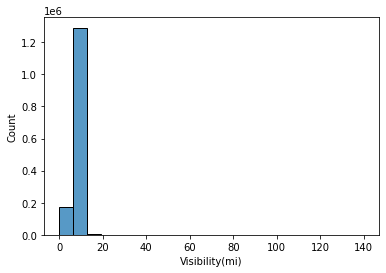

In [43]:
sns.histplot(df_1["Visibility(mi)"])

In [44]:
df_1["Traffic_Signal"].unique()

array([False,  True])

In [45]:
df_1["Traffic_Signal"].value_counts()

False    1346095
True      169969
Name: Traffic_Signal, dtype: int64

<AxesSubplot:ylabel='Traffic_Signal'>

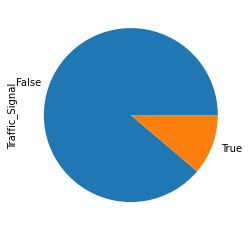

In [46]:
df_1["Traffic_Signal"].value_counts().plot(kind = "pie")

- we can see that traffic signals can be a couse for an increase in accidents

<AxesSubplot:ylabel='Junction'>

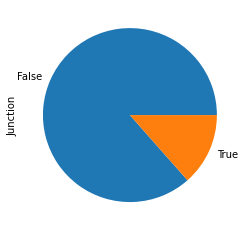

In [47]:
df_1["Junction"].value_counts().plot(kind = "pie")

- We can see that accidents occur at junctions and hence better precautions are needed

In [48]:
df_1["Severity"].unique()

array([3, 2, 4, 1])

In [49]:
df_1["Severity"].value_counts()

2    1212382
3     161052
4     114452
1      28178
Name: Severity, dtype: int64

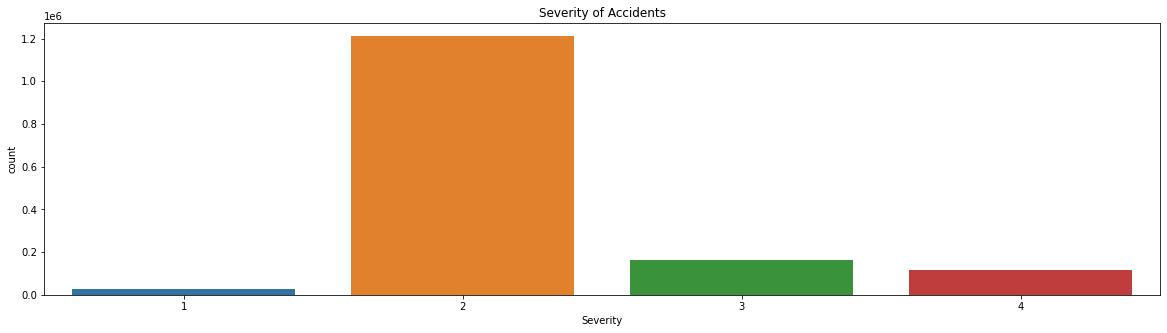

In [50]:
fig = plt.figure(figsize = (20,5))
sns.countplot(x = "Severity", data = df_1)
plt.title("Severity of Accidents")
plt.show()

- We can see that Severity 2 is the highest 

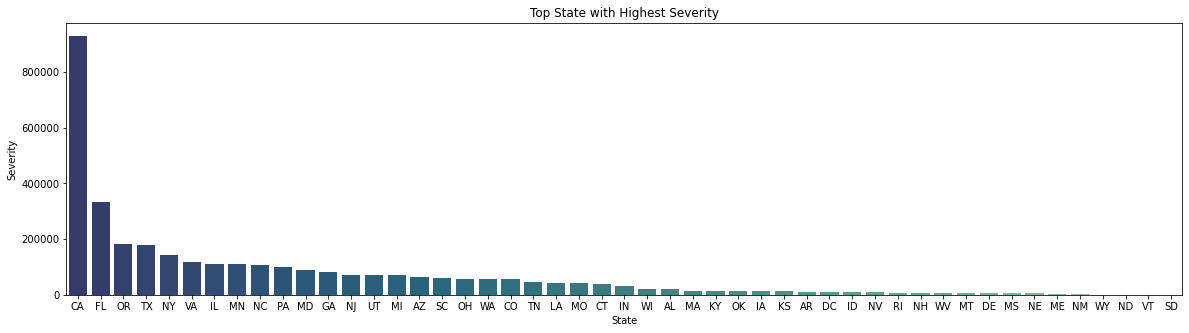

In [51]:
df_state = df_1.groupby('State').sum('Severity')[['Severity']]
df_state = df_state.reset_index().sort_values('Severity', ascending = False)[:50]
fig, ax = plt.subplots(figsize = (20,5))
c = sns.barplot(x = 'State', y = 'Severity', data = df_state, orient = 'v', palette = "crest_r")
c.set_title("Top State with Highest Severity")
plt.show()


- Conslusions

* the top 4 accident prone states were California, Florida, Oregon and Texas
* the top cities with the most accidents was LA,Miami Houstan and Dallas, in this visualisation we also saw that many of the states from California were in this plot, which is inline with pur observations we made from the previous graph
* Time periods between 5pm and 12pm have a high frequency of accidents, this might be due to the factor most individuals are on their way back from work
* We can see that between the year 202 had a higher rate of accidents and also the month of December in all the years had a extremely high rate of accidents
* We then also infer that many accidents occur at traffic signals and at jjuntions and hence more signs/precautions like speed bumps need to be put up at these places.

